# LOADING DATA AS DATAFRAMES USING PANDAS

In [3]:
import pandas as pd
import numpy as np


# Load CSV files into Pandas DataFrames
df_products = pd.read_csv("/content/PRODUCTS_TAKEHOME.csv")
df_users = pd.read_csv("/content/USER_TAKEHOME.csv")
df_transactions = pd.read_csv("/content/TRANSACTION_TAKEHOME.csv")

# Display top rows
print(df_users.head())
print(df_transactions.head())
print(df_products.head())

                         ID               CREATED_DATE  \
0  5ef3b4f17053ab141787697d  2020-06-24 20:17:54.000 Z   
1  5ff220d383fcfc12622b96bc  2021-01-03 19:53:55.000 Z   
2  6477950aa55bb77a0e27ee10  2023-05-31 18:42:18.000 Z   
3  658a306e99b40f103b63ccf8  2023-12-26 01:46:22.000 Z   
4  653cf5d6a225ea102b7ecdc2  2023-10-28 11:51:50.000 Z   

                  BIRTH_DATE STATE LANGUAGE  GENDER  
0  2000-08-11 00:00:00.000 Z    CA   es-419  female  
1  2001-09-24 04:00:00.000 Z    PA       en  female  
2  1994-10-28 00:00:00.000 Z    FL   es-419  female  
3                        NaN    NC       en     NaN  
4  1972-03-19 00:00:00.000 Z    PA       en  female  
                             RECEIPT_ID PURCHASE_DATE  \
0  0000d256-4041-4a3e-adc4-5623fb6e0c99    2024-08-21   
1  0001455d-7a92-4a7b-a1d2-c747af1c8fd3    2024-07-20   
2  00017e0a-7851-42fb-bfab-0baa96e23586    2024-08-18   
3  000239aa-3478-453d-801e-66a82e39c8af    2024-06-18   
4  00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1   

In [4]:
print(df_users.info())
print(df_transactions.info())
print(df_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-nul

In [5]:
# Convert date columns to datetime
df_users['CREATED_DATE'] = pd.to_datetime(df_users['CREATED_DATE'], errors='coerce')
df_users['BIRTH_DATE'] = pd.to_datetime(df_users['BIRTH_DATE'], errors='coerce')

# Replace empty strings with NaN
df_users.replace('', np.nan, inplace=True)

# Check for missing values
print(df_users.isna().sum())

ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64


In [6]:
# Convert the date columns to datetime
df_transactions['PURCHASE_DATE'] = pd.to_datetime(df_transactions['PURCHASE_DATE'], errors='coerce')
df_transactions['SCAN_DATE'] = pd.to_datetime(df_transactions['SCAN_DATE'], errors='coerce')

# Handle "zero" in numeric columns
def convert_to_numeric(x):
    if x == 'zero':
        return 0.0
    try:
        return float(x)
    except:
        return np.nan

df_transactions['FINAL_QUANTITY'] = df_transactions['FINAL_QUANTITY'].apply(convert_to_numeric)
df_transactions['FINAL_SALE'] = df_transactions['FINAL_SALE'].apply(convert_to_numeric)

# Inspect for missing barcodes, user IDs, etc.
print(df_transactions.isna().sum())

RECEIPT_ID            0
PURCHASE_DATE         0
SCAN_DATE             0
STORE_NAME            0
USER_ID               0
BARCODE            5762
FINAL_QUANTITY        0
FINAL_SALE        12500
dtype: int64


In [7]:
# Replace empty strings with NaN
df_products.replace('', np.nan, inplace=True)

# Check data types
print(df_products.info())

# Typically, BARCODE might need to be a string because leading zeros can matter
df_products['BARCODE'] = df_products['BARCODE'].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB
None


In [8]:
print(df_users['GENDER'].value_counts(dropna=False))

GENDER
female                    64240
male                      25829
NaN                        5892
transgender                1772
prefer_not_to_say          1350
non_binary                  473
unknown                     196
not_listed                  180
Non-Binary                   34
not_specified                28
My gender isn't listed        5
Prefer not to say             1
Name: count, dtype: int64


  STATE  USER_COUNT  STATE_IDX
0    TX        9028          0
1    FL        8921          1
2    CA        8589          2
3    NY        5703          3
4   NaN        4812          4
5    IL        3794          5
6    GA        3718          6
7    PA        3644          7
8    OH        3519          8
9    NC        3399          9


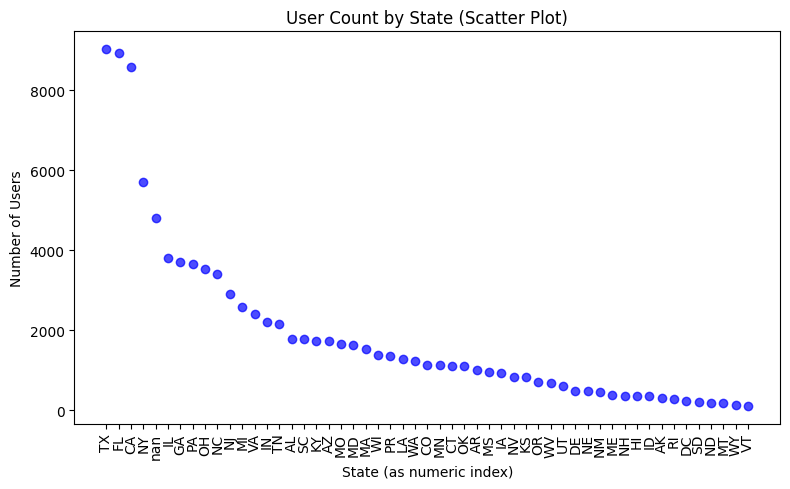

In [62]:
# 1. Count how many users per state
state_counts = df_users['STATE'].value_counts(dropna=False).reset_index()
state_counts.columns = ['STATE', 'USER_COUNT']

# 2. Create a numeric index for each state (for scatter x-values)
state_counts['STATE_IDX'] = range(len(state_counts))

print(state_counts.head(10))

# 3. Plot scatter
plt.figure(figsize=(8, 5))

plt.scatter(
    state_counts['STATE_IDX'],     # x-values (numeric indices)
    state_counts['USER_COUNT'],    # y-values (counts)
    color='blue',
    alpha=0.7
)

# 4. Label the plot
plt.title("User Count by State (Scatter Plot)")
plt.xlabel("State (as numeric index)")
plt.ylabel("Number of Users")

# 5. Replace x-axis ticks with actual state abbreviations
plt.xticks(
    ticks=state_counts['STATE_IDX'],
    labels=state_counts['STATE'],
    rotation=90
)

plt.tight_layout()
plt.show()

In [10]:
import datetime

current_date = pd.Timestamp.now()
df_users['AGE'] = df_users['BIRTH_DATE'].apply(
    lambda x: (current_date.year - x.year) if pd.notnull(x) else np.nan
)
df_users['AGE'] = df_users['AGE'].apply(lambda x: x if x > 0 else np.nan)  # Drop negative or zero

print(df_users[['ID', 'BIRTH_DATE', 'AGE']].head(10))
print(df_users['AGE'].describe())

                         ID                BIRTH_DATE   AGE
0  5ef3b4f17053ab141787697d 2000-08-11 00:00:00+00:00  25.0
1  5ff220d383fcfc12622b96bc 2001-09-24 04:00:00+00:00  24.0
2  6477950aa55bb77a0e27ee10 1994-10-28 00:00:00+00:00  31.0
3  658a306e99b40f103b63ccf8                       NaT   NaN
4  653cf5d6a225ea102b7ecdc2 1972-03-19 00:00:00+00:00  53.0
5  5fe2b6f3ad416a1265c4ab68 1999-10-27 04:00:00+00:00  26.0
6  651210546816bb4d035b1ead 1983-09-25 22:57:25+00:00  42.0
7  642831ea3d4434e63c1936fd 1970-02-16 05:00:00+00:00  55.0
8  63a4c9a1b5f32149b9d82f9e 1982-12-22 05:00:00+00:00  43.0
9  63654b21d02459d8a57a2e2c 1992-05-03 04:00:00+00:00  33.0
count    96325.000000
mean        40.827874
std         15.160172
min          3.000000
25%         27.000000
50%         40.000000
75%         51.000000
max        125.000000
Name: AGE, dtype: float64


In [11]:
print(df_users['LANGUAGE'].value_counts(dropna=False))

LANGUAGE
en        63403
NaN       30508
es-419     6089
Name: count, dtype: int64


In [12]:
print("Total transactions:", len(df_transactions))
print(df_transactions['STORE_NAME'].value_counts(dropna=False))

Total transactions: 50000
STORE_NAME
WALMART                   21326
DOLLAR GENERAL STORE       2748
ALDI                       2640
KROGER                     1494
TARGET                     1484
                          ...  
SPIRITS                       2
LA GLORIA SUPERMERCADO        2
FARM FRESH                    2
ALTA                          2
PLATEAU TRAVEL CENTER         2
Name: count, Length: 954, dtype: int64


In [13]:
print("FINAL_QUANTITY distribution:")
print(df_transactions['FINAL_QUANTITY'].describe())

print("FINAL_SALE distribution:")
print(df_transactions['FINAL_SALE'].describe())

FINAL_QUANTITY distribution:
count    50000.000000
mean         0.814427
std          1.841794
min          0.000000
25%          0.007500
50%          1.000000
75%          1.000000
max        276.000000
Name: FINAL_QUANTITY, dtype: float64
FINAL_SALE distribution:
count    37500.000000
mean         4.576384
std          6.625663
min          0.000000
25%          1.790000
50%          3.000000
75%          5.190000
max        462.820000
Name: FINAL_SALE, dtype: float64


In [14]:
store_sales = df_transactions.groupby('STORE_NAME')['FINAL_SALE'].sum().sort_values(ascending=False)
print(store_sales.head(10))

STORE_NAME
WALMART                 62004.35
COSTCO                  10626.05
SAM'S CLUB               8638.16
CVS                      7037.58
TARGET                   6973.81
WALGREENS                6845.82
DOLLAR GENERAL STORE     6642.08
ALDI                     5442.05
KROGER                   4355.21
MEIJER                   4193.63
Name: FINAL_SALE, dtype: float64


In [36]:
df_transactions['MONTH'] = df_transactions['PURCHASE_DATE'].dt.to_period('M')
transactions_by_month = df_transactions.groupby('MONTH')['RECEIPT_ID'].count()
print(transactions_by_month)

MONTH
2024-06    10854
2024-07    18576
2024-08    17124
2024-09     3446
Freq: M, Name: RECEIPT_ID, dtype: int64


In [15]:
print("Category_1 distribution:")
print(df_products['CATEGORY_1'].value_counts(dropna=False))

print("Category_2 distribution:")
print(df_products['CATEGORY_2'].value_counts(dropna=False))

print("Category_3 distribution:")
print(df_products['CATEGORY_3'].value_counts(dropna=False))

Category_1 distribution:
CATEGORY_1
Health & Wellness         512695
Snacks                    324817
Beverages                   3990
Pantry                       871
Apparel & Accessories        846
Dairy                        602
Needs Review                 547
Alcohol                      503
Home & Garden                115
NaN                          111
Restaurant                    69
Deli & Bakery                 69
Frozen                        62
Meat & Seafood                49
Sporting Goods                47
Office & School               45
Toys & Games                  28
Household Supplies            24
Produce                       20
Animals & Pet Supplies        16
Arts & Entertainment           7
Electronics                    5
Mature                         3
Vehicles & Parts               3
Baby & Toddler                 3
Beauty                         2
Media                          2
Luggage & Bags                 1
Name: count, dtype: int64
Category_2 dis

In [16]:
print(df_products['BRAND'].value_counts(dropna=False).head(10))

BRAND
NaN                226472
REM BRAND           20813
BRAND NOT KNOWN     17025
PRIVATE LABEL       13467
CVS                  6400
SEGO                 4831
MEIJER               4050
DOVE                 3857
RITE AID             3238
MATRIX               2958
Name: count, dtype: int64


In [17]:
missing_barcodes = df_products[df_products['BARCODE'].isna()]
print(missing_barcodes)

Empty DataFrame
Columns: [CATEGORY_1, CATEGORY_2, CATEGORY_3, CATEGORY_4, MANUFACTURER, BRAND, BARCODE]
Index: []


In [18]:
df_merged_ut = df_transactions.merge(
    df_users,
    left_on='USER_ID',
    right_on='ID',
    how='left'
)

In [19]:
# In df_transactions
df_merged_ut['BARCODE'] = df_merged_ut['BARCODE'].fillna('').astype(str)

# In df_products:
df_products['BARCODE'] = df_products['BARCODE'].fillna('').astype(str)


df_merged_all = df_merged_ut.merge(
    df_products,
    left_on='BARCODE',
    right_on='BARCODE',
    how='left'
)

# Inspect final merged table
print(df_merged_all.head())

                             RECEIPT_ID PURCHASE_DATE  \
0  0000d256-4041-4a3e-adc4-5623fb6e0c99    2024-08-21   
1  0001455d-7a92-4a7b-a1d2-c747af1c8fd3    2024-07-20   
2  00017e0a-7851-42fb-bfab-0baa96e23586    2024-08-18   
3  000239aa-3478-453d-801e-66a82e39c8af    2024-06-18   
4  00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1    2024-07-04   

                         SCAN_DATE STORE_NAME                   USER_ID  \
0 2024-08-21 14:19:06.539000+00:00    WALMART  63b73a7f3d310dceeabd4758   
1 2024-07-20 09:50:24.206000+00:00       ALDI  62c08877baa38d1a1f6c211a   
2 2024-08-19 15:38:56.813000+00:00    WALMART  60842f207ac8b7729e472020   
3 2024-06-19 11:03:37.468000+00:00  FOOD LION  63fcd7cea4f8442c3386b589   
4 2024-07-05 15:56:43.549000+00:00   RANDALLS  6193231ae9b3d75037b0f928   

          BARCODE  FINAL_QUANTITY  FINAL_SALE   ID CREATED_DATE  ... STATE  \
0   15300014978.0             1.0         NaN  NaN          NaT  ...   NaN   
1                             0.0        1.49  NaN

STATE
TX    10.520000
MI     9.970000
IA     8.970000
PA     8.406923
DE     7.560000
NY     5.662500
SC     5.465714
CA     5.065000
TN     4.980000
FL     4.758966
Name: FINAL_SALE, dtype: float64


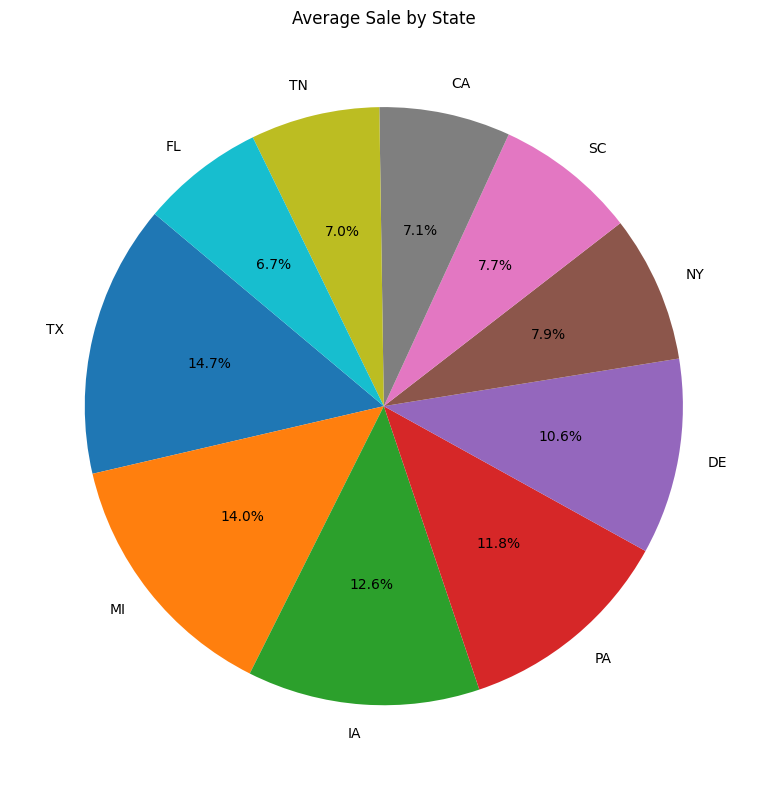

In [67]:
#Which state has the highest average FINAL_SALE?

import matplotlib.pyplot as plt

avg_sale_by_state = df_merged_all.groupby('STATE')['FINAL_SALE'].mean().sort_values(ascending=False)

top10 = avg_sale_by_state.head(10)
print(top10)
plt.figure(figsize=(8, 8))
plt.pie(
    top10,
    labels=top10.index,
    autopct='%1.1f%%',         # Show percentages with 1 decimal
    startangle=140
)
plt.title("Average Sale by State")
plt.tight_layout()
plt.show()

GENDER
female    157.0
male       37.0
Name: FINAL_QUANTITY, dtype: float64


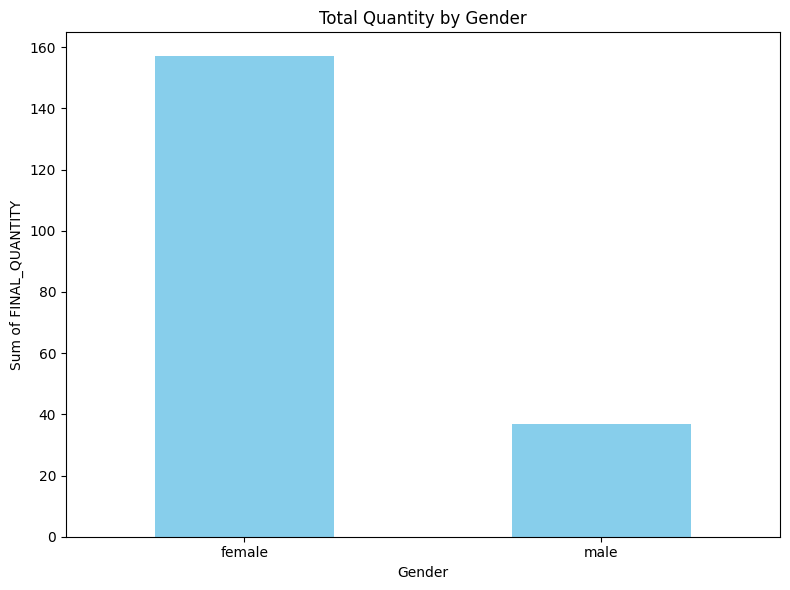

In [69]:
#Which gender buys the most items (based on sum of FINAL_QUANTITY)?

quantity_by_gender = df_merged_all.groupby('GENDER')['FINAL_QUANTITY'].sum().sort_values(ascending=False)
print(quantity_by_gender)

plt.figure(figsize=(8, 6))
quantity_by_gender.plot(
    kind='bar',
    color='skyblue',
    rot=0
)

# 3. Label the chart
plt.title("Total Quantity by Gender")
plt.xlabel("Gender")
plt.ylabel("Sum of FINAL_QUANTITY")

# 4. Display the plot
plt.tight_layout()
plt.show()


CATEGORY_1
Snacks               11942.32
Health & Wellness     5343.60
Beverages             1444.70
Pantry                 156.34
Dairy                  129.00
Alcohol                 85.00
Deli & Bakery           21.00
Frozen                  19.00
Needs Review            17.00
Produce                  2.00
Name: FINAL_QUANTITY, dtype: float64


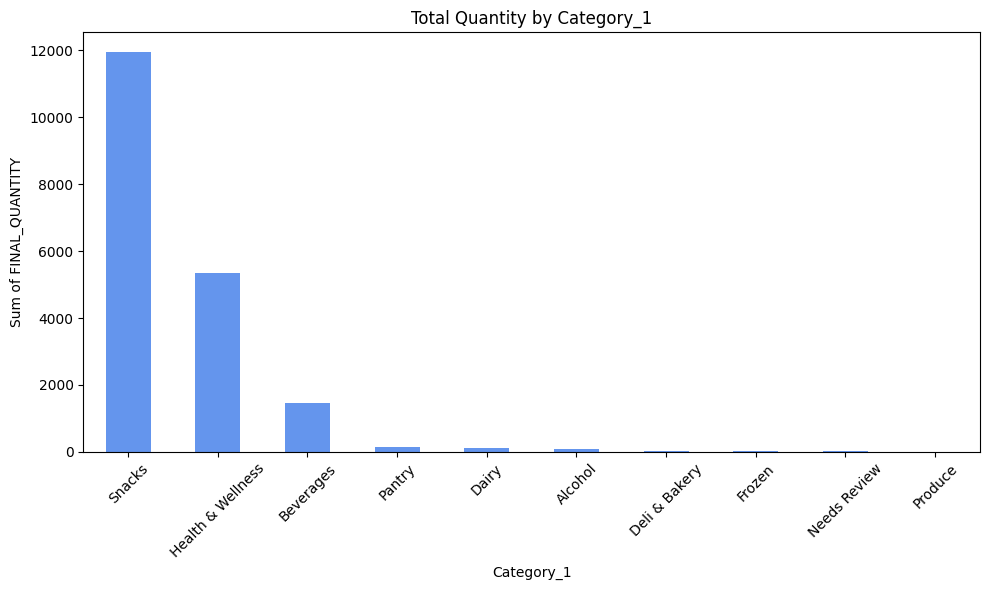

In [41]:
#Which product categories (CATEGORY_1) are most popular by total quantity?

quantity_by_category1 = df_merged_all.groupby('CATEGORY_1')['FINAL_QUANTITY'].sum().sort_values(ascending=False)
print(quantity_by_category1)

plt.figure(figsize=(10, 6))
quantity_by_category1.plot(
    kind='bar',
    color='cornflowerblue',
    rot=45
)

plt.title("Total Quantity by Category_1")
plt.xlabel("Category_1")
plt.ylabel("Sum of FINAL_QUANTITY")

plt.tight_layout()
plt.show()

BRAND
WATERPIK           59.970
SPORTS RESEARCH    59.950
SONICARE           54.980
SOL DE JANEIRO     48.000
LA ROCHE-POSAY     44.990
IT'S A 10          44.990
ASSURANCE          41.995
HOMEDICS           41.850
TRUSKIN            39.980
BINAXNOW           39.938
Name: FINAL_SALE, dtype: float64


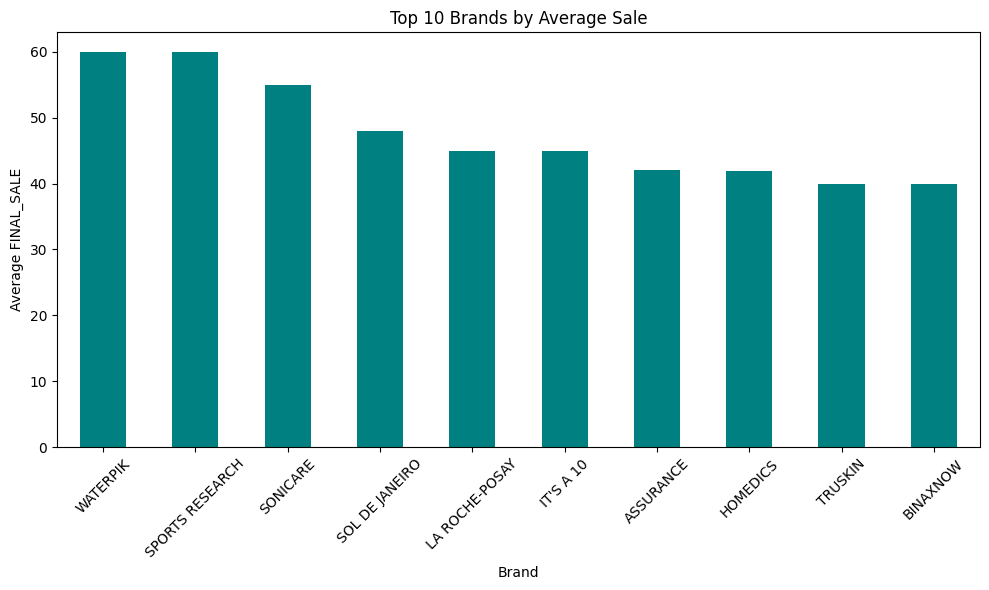

In [43]:
#Average FINAL_SALE for each brand, sorted descending (top 10)

avg_sale_by_brand = (df_merged_all.groupby('BRAND')['FINAL_SALE']
                                    .mean()
                                    .sort_values(ascending=False))
print(avg_sale_by_brand.head(10))

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

avg_sale_by_brand.head(10).plot(
    kind='bar',
    color='teal',

)

# 3. Add labels and title
plt.title("Top 10 Brands by Average Sale")
plt.xlabel("Brand")
plt.ylabel("Average FINAL_SALE")

# 4. Display the plot
plt.tight_layout()
plt.show()

<ipython-input-51-134d76f5bad4>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('AGE_RANGE')['FINAL_SALE']


  AGE_RANGE  total_sales
0      0-17         0.00
1     18-24         0.00
2     25-34        73.75
3     35-44       232.52
4     45-54       175.89
5     55-64       143.14
6       65+       262.18


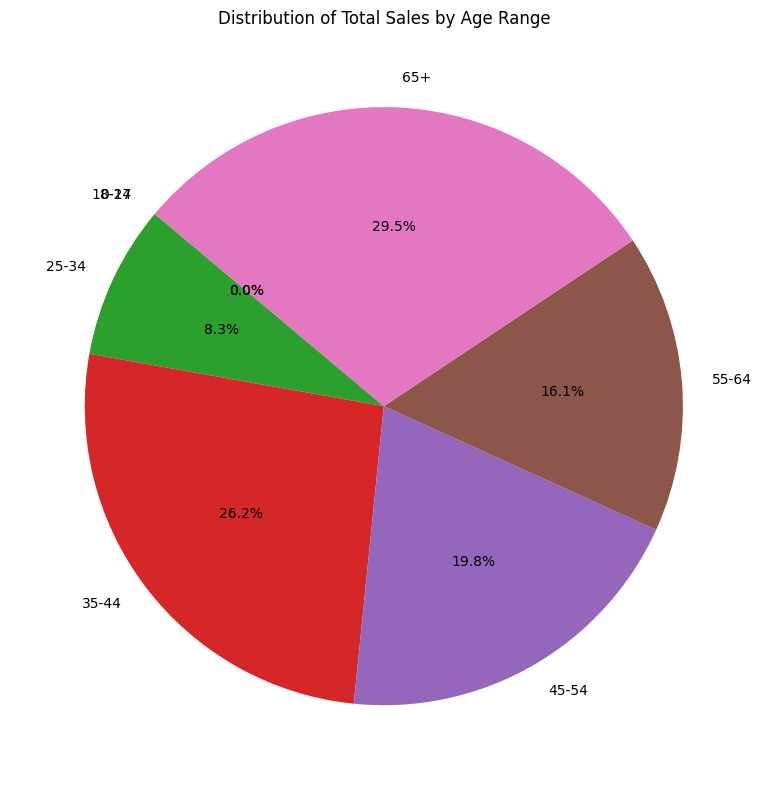

In [51]:
#Age vs. total sales

bins = [0, 17, 24, 34, 44, 54, 64, 150]  # last bin up to age 150, for safety
labels = ["0-17", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]

# 2. Create a new column for 'AGE_RANGE'
df_merged_all['AGE_RANGE'] = pd.cut(
    df_merged_all['AGE'],
    bins=bins,
    labels=labels,
    right=True,       # right=True => bin edges are inclusive of the right edge
    include_lowest=True
)

# 3. Group by AGE_RANGE and sum FINAL_SALE
sales_by_age_range = (
    df_merged_all
    .groupby('AGE_RANGE')['FINAL_SALE']
    .sum()
    .reset_index(name='total_sales')
)
print(sales_by_age_range)

plt.figure(figsize=(8, 8))

# Use the total_sales as the values, and AGE_RANGE as the labels
plt.pie(
    sales_by_age_range['total_sales'],
    labels=sales_by_age_range['AGE_RANGE'],
    autopct='%1.1f%%',     # format for showing percentages
    startangle=140
)

plt.title("Distribution of Total Sales by Age Range")

plt.tight_layout()
plt.show()


# Closed-Ended Questions
## 1. Top 5 brands by receipts scanned among users 21 and over


In [26]:
from datetime import datetime

today = pd.Timestamp.now()

# Create an AGE column in df_users, or do it on the merged DataFrame:
df_merged_all['AGE'] = df_merged_all['BIRTH_DATE'].apply(
    lambda bd: today.year - bd.year if pd.notnull(bd) else np.nan
)

df_over_21 = df_merged_all[df_merged_all['AGE'] >= 21]

top_5_brands_over_21 = (
    df_over_21
    .groupby('BRAND')['RECEIPT_ID']
    .nunique()  # count unique receipts
    .sort_values(ascending=False)
    .head(5)
)

print("Top 5 brands by unique receipts among users 21+:\n", top_5_brands_over_21)


Top 5 brands by unique receipts among users 21+:
 BRAND
NERDS CANDY        3
DOVE               3
SOUR PATCH KIDS    2
TRIDENT            2
MEIJER             2
Name: RECEIPT_ID, dtype: int64


## 2. Who are Fetch’s power users?


In [52]:
# 1) Aggregate total receipts (unique) and total sales per user

user_aggregates = (
    df_merged_all
    .groupby('USER_ID')
    .agg({
        'RECEIPT_ID': 'nunique',   # unique receipts scanned
        'FINAL_SALE': 'sum'       # total spending
    })
    .rename(columns={'RECEIPT_ID': 'total_receipts',
                     'FINAL_SALE': 'total_sales'})
    .reset_index()
)

# 2) Find the cutoff for top 1% by total_receipts, for example
threshold_receipts = user_aggregates['total_receipts'].quantile(0.99)  # top 1%
power_users_by_receipts = user_aggregates[user_aggregates['total_receipts'] >= threshold_receipts]

# 3) Top 1% by total sales
threshold_sales = user_aggregates['total_sales'].quantile(0.99)
power_users_by_sales = user_aggregates[user_aggregates['total_sales'] >= threshold_sales]
power_users = pd.concat([power_users_by_receipts, power_users_by_sales]).drop_duplicates()

print("=== Power Users ===")
print(power_users.head(10))


=== Power Users ===
                      USER_ID  total_receipts  total_sales
5    5751fbefe4b008fae9acab39               4        20.93
34   58bde4f4e4b0883d67f37bf7               5        16.20
35   58c74044e4b0883d67f64442               5        20.22
40   5918f029e4b0577ef8f155ed               4         9.40
49   5956b756e4b0eb5f9a207cea               4        19.75
58   59605648e4b0f0f7875e6079               4        54.45
63   596967d2e4b0a5b78b822931               4         6.89
263  5a425856e4b09d5e0c9d749f               4        28.34
310  5a6b6f35e4b00bcc4d7fc708               4        27.86
343  5a9e00c4e4b0e07ed29e4bde               4        19.05


## 3. What is the percentage of sales in the Health & Wellness category by generation?

In [54]:
df_merged_all['CREATED_DATE'] = df_merged_all['CREATED_DATE'].dt.tz_localize(None)
df_merged_all['BIRTH_DATE'] = df_merged_all['BIRTH_DATE'].dt.tz_localize(None)

today = pd.Timestamp.now().tz_localize(None)

def assign_generation(birth_year):
    if birth_year >= 1997:
        return "Gen Z"
    elif birth_year >= 1981:
        return "Millennials"
    elif birth_year >= 1965:
        return "Gen X"
    elif birth_year >= 1946:
        return "Boomers"
    else:
        return "No age data"

# ---------------------------
# Add generation column
# ---------------------------
df_merged_all['birth_year'] = df_merged_all['BIRTH_DATE'].dt.year
df_merged_all['GENERATION'] = df_merged_all['birth_year'].apply(assign_generation)

# ---------------------------
# Filter Health & Wellness
# ---------------------------
df_hw = df_merged_all[df_merged_all['CATEGORY_1'] == 'Health & Wellness']

# ---------------------------
# Calculate total sales & %
# ---------------------------
hw_sales_by_gen = (
    df_hw.groupby('GENERATION')['FINAL_SALE']
         .sum()
         .reset_index(name='gen_total_hw_sales')
)

total_hw_sales = hw_sales_by_gen['gen_total_hw_sales'].sum()

hw_sales_by_gen['pct_of_hw_sales'] = (
    hw_sales_by_gen['gen_total_hw_sales'] / total_hw_sales * 100
)

print("Percentage of Health & Wellness Sales by Generation:")
print(hw_sales_by_gen)


Percentage of Health & Wellness Sales by Generation:
    GENERATION  gen_total_hw_sales  pct_of_hw_sales
0      Boomers               89.03         0.214801
1        Gen X               41.50         0.100126
2  Millennials               59.13         0.142662
3  No age data            41258.08        99.542412


## 4. At what percent has Fetch grown year over year?

In [56]:
# Convert numeric columns (if they have "zero" or other strings):
def to_float_or_zero(val):
    if val == 'zero':
        return 0.0
    try:
        return float(val)
    except:
        return 0.0

df_transactions['FINAL_SALE'] = df_transactions['FINAL_SALE'].apply(to_float_or_zero)

##########################################
# 3. Year-Over-Year Growth in New Users  #
##########################################
# A) Extract the year from CREATED_DATE
df_users['CREATION_YEAR'] = df_users['CREATED_DATE'].dt.year

# B) Count new users by year
users_by_year = (
    df_users
    .groupby('CREATION_YEAR')['ID']
    .nunique()  # Count unique user IDs
    .reset_index(name='new_users')
    .sort_values('CREATION_YEAR')
)

# C) Calculate YoY % change in new users
users_by_year['yoy_growth_pct'] = users_by_year['new_users'].pct_change() * 100

print("\n=== Year-over-Year Growth in New Users ===")
print(users_by_year)

################################################
# 4. Year-Over-Year Growth in Total Sales (Revenue)
################################################
# A) Extract the year from PURCHASE_DATE
df_transactions['YEAR'] = df_transactions['PURCHASE_DATE'].dt.year

# B) Sum FINAL_SALE per year
sales_by_year = (
    df_transactions
    .groupby('YEAR')['FINAL_SALE']
    .sum()
    .reset_index(name='annual_sales')
    .sort_values('YEAR')
)

# C) Calculate YoY % change in annual sales
sales_by_year['yoy_growth_pct'] = sales_by_year['annual_sales'].pct_change() * 100

print("\n=== Year-over-Year Growth in Total Sales ===")
print(sales_by_year)



=== Year-over-Year Growth in New Users ===
    CREATION_YEAR  new_users  yoy_growth_pct
0            2014         30             NaN
1            2015         51       70.000000
2            2016         70       37.254902
3            2017        644      820.000000
4            2018       2168      236.645963
5            2019       7093      227.167897
6            2020      16883      138.023403
7            2021      19159       13.481016
8            2022      26807       39.918576
9            2023      15464      -42.313575
10           2024      11631      -24.786601

=== Year-over-Year Growth in Total Sales ===
   YEAR  annual_sales  yoy_growth_pct
0  2024      171614.4             NaN
